## 1. Introduction: Analysis of Crime in NYC By Location

Sean Markey, Dec. 2021

The below notebook's main intent is to guide the reader through an investigation of crime in New York City, paying specific attention to the locations at which said crimes take place. Much attention will be paid to comparison between the crime rates of the five boroughs of the city, which could help us understand the underlying reasons for differences in crime rates throughout the city. This comparison will involve not only the quantity of arrests from borough to borough, but also the severity of crimes committed leading to such arrests. I believe it will be interesting to compare the ratio of misdemeanors to felonies throughout the boroughs of NYC.

A secondary focus is being placed on an investigation into how the setting of a crime can be used to predict the actual crime committed. I don't expect to have accurate results due to the limitations of this dataset, but I believe it will be interesting to see which factors the model identifies as most important in making its decision. In order to look into this, I plan on implementing a decision tree in order to take advantage of its simplicity and readability for further analysis.

## 2. Data Cleaning

In [647]:
import pandas as pd
import numpy as np
import folium

from folium import plugins
from folium.plugins import HeatMap 

import matplotlib.pyplot as plt

Here, we will be using data on crime provided by the police department of New York City, linked [here](https://www1.nyc.gov/site/nypd/stats/crime-statistics/citywide-crime-stats.page). At this link, you can find additional information regarding not only arrests, but also data regarding court summons, shootings, and complaints.

At the link above, you can find crime data dating back to 2013, yet I chose to focus on this most recent year for analysis. This is for a few reasons, mainly that it greatly minimized the number of datapoints and allowed for easier data analysis. I also noticed that upon preliminary inspection, older data seemed to be patchier and just generally worse to work with. Furthermore, I wasn't planning on analyzing the time element to these datasets, so I wouldn't need a wide range of dates for effective analysis.

This is an example of the data from the start. It contains ~100,000 data points regarding specific arrests made in New York City over the past year. These data points include information about the crime itself, the perpetrator's age, race, sex, and the location of the crime. 

In [648]:
df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")

df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


As you can see, not much cleaning should be needed here. I mostly would like to first drop some columns I don't plan on using going forward

In [649]:
df = df.drop(columns=["ARREST_KEY", "PD_CD", "PD_DESC", "LAW_CODE", "ARREST_PRECINCT", 
                      "X_COORD_CD", "Y_COORD_CD", "New Georeferenced Column"])

df.head()

,ARREST_DATE,KY_CD,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,09/29/2021,106.0,FELONY ASSAULT,F,B,0,25-44,M,BLACK,40.826189,-73.909738
1,09/27/2021,104.0,RAPE,F,K,0,25-44,M,BLACK,40.674583,-73.930222
2,09/25/2021,106.0,FELONY ASSAULT,F,Q,0,25-44,M,BLACK,40.603441,-73.765986
3,09/25/2021,344.0,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,M,BLACK,40.837782,-73.919458
4,09/25/2021,344.0,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,M,BLACK,40.835990,-73.916276


Here, I drop the null entries of the database. I don't think I have any shortage of data, so I don't see the need to try and salvage these rows going forward.

In [650]:
df = df.dropna()

df.head()

,ARREST_DATE,KY_CD,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,09/29/2021,106.0,FELONY ASSAULT,F,B,0,25-44,M,BLACK,40.826189,-73.909738
1,09/27/2021,104.0,RAPE,F,K,0,25-44,M,BLACK,40.674583,-73.930222
2,09/25/2021,106.0,FELONY ASSAULT,F,Q,0,25-44,M,BLACK,40.603441,-73.765986
3,09/25/2021,344.0,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,M,BLACK,40.837782,-73.919458
4,09/25/2021,344.0,ASSAULT 3 & RELATED OFFENSES,M,B,0,25-44,M,BLACK,40.835990,-73.916276


## 3. Data Analysis and Visualization

First, I just want to get an idea of what offenses are listed within this dataset so I know what to look for in the future. I did this by taking all unique values of offenses listed and printing them.

In [652]:
offenses = set(df['OFNS_DESC'])


Next, we set up a starting heatmap just to get an idea of how crimes are distributed throughout the boroughs of New York City. I chose to sample only a percent of the total dataset as not to oversaturate the heatmap's data.

In [653]:
heatmap = folium.Map(location=[40.73, -74], zoom_start=11)

heat_df = df.sample(frac=.01)
heat_df = heat_df[['Latitude', 'Longitude']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Crime in NYC 2021</b></h3>
             '''
heatmap.get_root().html.add_child(folium.Element(title_html))

HeatMap(heat_data).add_to(heatmap)

heatmap

From this map, we can get a decent idea of how crimes are distributed throughout NYC. We notice a significantly lower amount of arrests made in Staten Island compared to the other boroughs. It would require further investigation to see whether or not this is due entirely to its lower population, or other factors like the higher GDP per capita of its citizens than the other boroughs.

The following three heatmaps are meant to investigate the effect of location on the severity of arrests made. The categories each arrest is assigned to are violations, misdemeanors, and felonies in order of increasing severity.

We choose to sample a limited amount of points from each category such that the heatmaps are not overly affected by the differing proportions of violations vs. misdemeanors vs. felonies

In [654]:
# the number of arrests we choose to sample for the below heatmaps
heatmap_ss = 250

In [655]:
heatmap = folium.Map(location=[40.73, -74], zoom_start=11)


heat_df = df[df['LAW_CAT_CD'] == 'V'].sample(heatmap_ss)
heat_df = heat_df[['Latitude', 'Longitude']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Violations Committed in NYC 2021</b></h3>
             '''
heatmap.get_root().html.add_child(folium.Element(title_html))

HeatMap(heat_data).add_to(heatmap)

heatmap

In [656]:
heatmap = folium.Map(location=[40.73, -74], zoom_start=11)


heat_df = df[df['LAW_CAT_CD'] == 'M'].sample(heatmap_ss)
heat_df = heat_df[['Latitude', 'Longitude']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Misdemeanors Committed in NYC 2021</b></h3>
             '''
heatmap.get_root().html.add_child(folium.Element(title_html))

HeatMap(heat_data).add_to(heatmap)

heatmap

In [657]:
heatmap = folium.Map(location=[40.73, -74], zoom_start=11)


heat_df = df[df['LAW_CAT_CD'] == 'F'].sample(heatmap_ss)
heat_df = heat_df[['Latitude', 'Longitude']]
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Felonies Committed in NYC 2021</b></h3>
             '''
heatmap.get_root().html.add_child(folium.Element(title_html))

HeatMap(heat_data).add_to(heatmap)

heatmap

The most surprising difference I found here was the increasing representation of Staten Island in misdemeanors and felonies over violations. My intuition was that the generally higher economic standing of its residents would lead to most of its crimes being less severe. I hypothesize this could be due to the lowered police presence in Staten Island - police come there on calls to control more serious offenses, but are less likely to naturally be in the area to arrest for simple violations. I have no means of testing this hypothesis in particular, but more in-depth investigation is made into discrepancies in arrests between the boroughs of NYC below.

Here, I sourced the populations of each individual borough just through simple Google search, and median household incomes from [this table](https://www.baruch.cuny.edu/nycdata/income-taxes/med_hhold_income.htm). I used them for plotting below.

In [658]:
populations = {
    "Bronx": 1435000,
    "Brooklyn": 2590000,
    "Manhattan": 1632000,
    "Queens": 2287000,
    "Staten Island": 474000
}

med_household_inc = {
    "Bronx": 37379,
    "Brooklyn": 56942,
    "Manhattan": 85071,
    "Queens": 64509,
    "Staten Island": 79201
}

labels = ['Bronx','Brooklyn','Manhattan', 'Queens', 'Staten Island']

populations = pd.Series(populations)
med_household_inc = pd.Series(med_household_inc)
populations

Bronx            1435000
Brooklyn         2590000
Manhattan        1632000
Queens           2287000
Staten Island     474000
dtype: int64

Now, I choose to look into how these arrests are distributed by borough. I though a pie chart would be the best way to represent this visually, since we're just looking for the percentage of total arrests that occured in each borough. I decided to compare this side by side with a similar pie chart depicting the population of each borough, so we can get an idea of which boroughs are under/overrepresented in arrests.

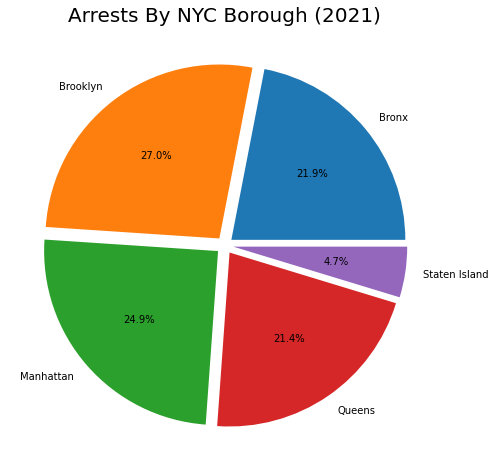

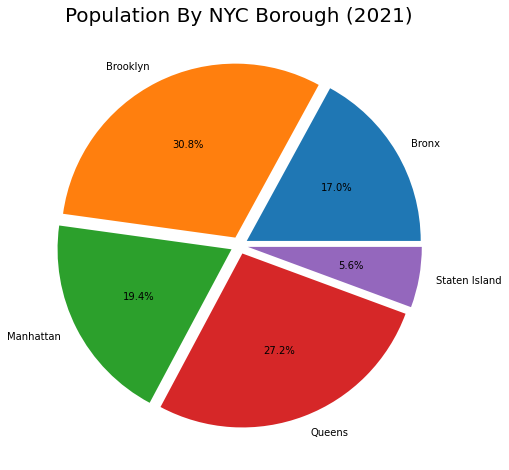

In [659]:
borough_dist = df.groupby('ARREST_BORO').count()['KY_CD']

plt.figure(figsize=(8,8))
plt.title('Arrests By NYC Borough (2021)', fontsize=20)
plt.pie(borough_dist, explode=(0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(8,8))
plt.title('Population By NYC Borough (2021)', fontsize=20)
plt.pie(populations, explode=(0.05, 0.05, 0.05, 0.05, 0.05), labels=labels, autopct='%1.1f%%')
plt.show()

Drawing a pie chart of the population next to the arrests pie chart helps us understand the relation between the population of each borough and its portion of arrests. From this, we see that the boroughs of The Bronx and Manhattan are overrepresented in arrests, while Queens and Brooklyn are underrepresented. We see that Staten Island is just about normally represented for its population. Below we look further into the possible reasons for this.

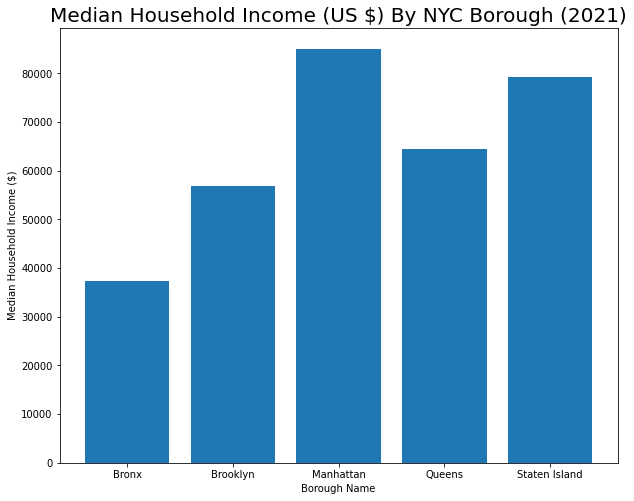

In [660]:
plt.figure(figsize=(10,8))
plt.title('Median Household Income (US $) By NYC Borough (2021)', fontsize=20)
plt.bar(labels, med_household_inc)
plt.ylabel("Median Household Income ($)")
plt.xlabel("Borough Name")
plt.show()

Looking at the median household income for each borough, we see that it doesn't offer much of an explanation for the data above. Despite having the highest household income by a decent margin, Manhattan is the most criminally overrepresented bureau- making up 19.4% of the population yet contributing to 24.9% of the arrests.

Now, we look into what types of arrests are occuring in each borough in search of a better explanation.

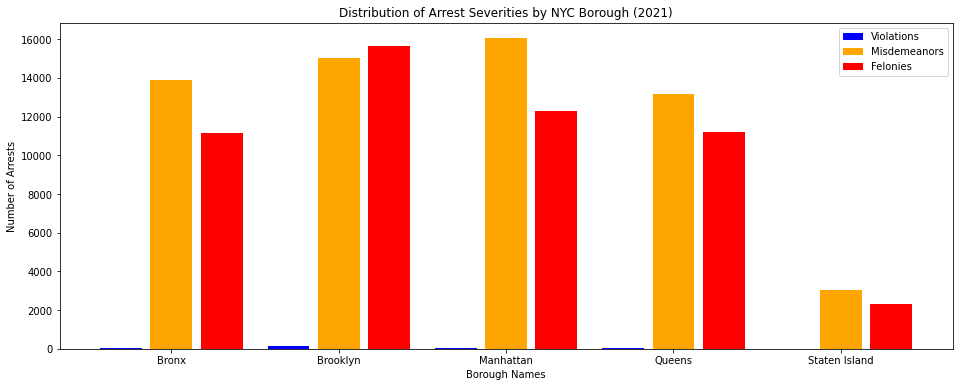

In [661]:
df_bronx = df[df['ARREST_BORO'] == 'B']
df_brook = df[df['ARREST_BORO'] == 'K']
df_manhat = df[df['ARREST_BORO'] == 'M']
df_queens = df[df['ARREST_BORO'] == 'Q']
df_staten = df[df['ARREST_BORO'] == 'S']

borough_dfs = [df_bronx, df_brook, df_manhat, df_queens, df_staten]

crimes = []

for borough in borough_dfs:
  violations = len(borough[borough['LAW_CAT_CD'] == 'V'])
  misdemeanors = len(borough[borough['LAW_CAT_CD'] == 'M'])
  felonies = len(borough[borough['LAW_CAT_CD'] == 'F'])

  crimes.append((violations, misdemeanors, felonies))

plt.figure(figsize=(16,6))
  
X_axis = np.arange(len(labels))

V = [crime[0] for crime in crimes]
M = [crime[1] for crime in crimes]
F = [crime[2] for crime in crimes]
  
plt.bar(X_axis - 0.3, V, 0.25, label = 'Violations', color='b')
plt.bar(X_axis, M, 0.25, label = 'Misdemeanors', color='orange')
plt.bar(X_axis + 0.3, F, 0.25, label = 'Felonies', color='r')

  
plt.xticks(X_axis, labels)
plt.xlabel("Borough Names")
plt.ylabel("Number of Arrests")
plt.title("Distribution of Arrest Severities by NYC Borough (2021)")
plt.legend()
plt.show()


This chart helps us understand why Manhattan and the Bronx were so overrepresented in their arrests compared to the other boroughs. More so than other boroughs, they have a high ratio of misdemeanor to felony arrests. From this we can see that although Manhattan and the Bronx have a higher volume of arrests for their population, other boroughs tend to have arrests for more severe crimes.

## 4. Machine Learning

For the machine learning portion of this walkthrough, I plan on pivoting to asking questions that are better suited for machine learning. One thing I would like to look into is predicting the type of crime committed for an arrest based on data surrounding it: the location/borough it took place in, the race, age, and gender of its perpetrator.

I'm choosing to categorize between 4 separate categories of crime: Forgery, Felony Assault, Sex Crimes, and Petit Larceny. I picked crimes with distinct levels of severity, all of which have a large number of offenses. From the dataset, I sample an equal portion of arrests for each offense such that the model isn't incentivized to guess at certain offenses just because they're more common.

Here, we separate out these four categories, and remove from the dataframe the ones we aren't looking at here.

In [662]:
df['OFFENSE'] = -1
df.loc[(df['OFNS_DESC'] == 'PETIT LARCENY'), 'OFFENSE'] = 0
df.loc[(df['OFNS_DESC'] == 'FORGERY'), 'OFFENSE'] = 1
df.loc[(df['OFNS_DESC'] == 'SEX CRIMES'), 'OFFENSE'] = 2
df.loc[(df['OFNS_DESC'] == 'FELONY ASSAULT'), 'OFFENSE'] = 3

df = df[df['OFFENSE'] != -1]
df.head()

,ARREST_DATE,KY_CD,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,OFFENSE
0,09/29/2021,106.0,FELONY ASSAULT,F,B,0,25-44,M,BLACK,40.826189,-73.909738,3
2,09/25/2021,106.0,FELONY ASSAULT,F,Q,0,25-44,M,BLACK,40.603441,-73.765986,3
7,09/21/2021,106.0,FELONY ASSAULT,F,B,0,25-44,M,WHITE,40.810383,-73.904528,3
13,08/31/2021,116.0,SEX CRIMES,F,Q,0,25-44,M,WHITE,40.743080,-73.954736,2
21,08/12/2021,106.0,FELONY ASSAULT,F,K,0,25-44,F,BLACK,40.648867,-73.950822,3


Here, we construct our training dataset by sampling an equal amount from each variety, and then concatenating them together in the dataframe.

In [663]:
larcenies = df[df['OFFENSE'] == 0].sample(2000)
forgeries = df[df['OFFENSE'] == 1].sample(2000)
sex_crimes = df[df['OFFENSE'] == 2].sample(2000)
assaults = df[df['OFFENSE'] == 3].sample(2000)

df = pd.concat([larcenies, forgeries, sex_crimes, assaults])

Here, we use one-hot encoding on our categorical input features to help with training later. You can read more about one-hot encoding [here](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

In [664]:
df = pd.get_dummies(df, columns=['ARREST_BORO', 'PERP_RACE', 'PERP_SEX', 'AGE_GROUP'])
df.head()

,ARREST_DATE,KY_CD,OFNS_DESC,LAW_CAT_CD,JURISDICTION_CODE,Latitude,Longitude,OFFENSE,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC,PERP_SEX_F,PERP_SEX_M,AGE_GROUP_18-24,AGE_GROUP_25-44,AGE_GROUP_45-64,AGE_GROUP_65+,AGE_GROUP_<18
8119,09/25/2021,341.0,PETIT LARCENY,M,0,40.862189,-73.890712,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
46423,05/28/2021,341.0,PETIT LARCENY,M,0,40.750431,-73.989282,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
93326,02/19/2021,341.0,PETIT LARCENY,M,0,40.733927,-73.871582,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
109271,02/17/2021,341.0,PETIT LARCENY,M,0,40.726725,-73.853261,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
8975,09/27/2021,341.0,PETIT LARCENY,M,0,40.798293,-73.940822,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


Now, we split our data into training and testing sets for cross-validation. We choose to take a random sample of 20% of the training data as testing data. In order to assure the validity of our results and avoid over-fitting, we fit our model on the training data and then afterwards test it on this separate testing data.

In [665]:
from sklearn.model_selection import train_test_split

in_df = df.drop(columns=['ARREST_DATE', 'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD', 'JURISDICTION_CODE', 'Latitude', 'Longitude', 'OFFENSE'])
out_df = df[['OFFENSE']]

train_in, test_in, train_out, test_out = train_test_split(in_df.values, out_df.values, test_size=0.20, random_state=42)

print(f"training data length: {len(train_in)}\ntesting data length: {len(test_in)}")
in_df.head()

training data length: 6400
testing data length: 1600


,ARREST_BORO_B,ARREST_BORO_K,ARREST_BORO_M,ARREST_BORO_Q,ARREST_BORO_S,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC,PERP_SEX_F,PERP_SEX_M,AGE_GROUP_18-24,AGE_GROUP_25-44,AGE_GROUP_45-64,AGE_GROUP_65+,AGE_GROUP_<18
8119,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
46423,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
93326,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
109271,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
8975,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


For this task, I thought it would be helpful to try a decision tree for classifying this crime data. In my mind, the decision tree is a simple model which should be able to use the training data to derive simple and intelligible rules for classifying it. For example, one node could identify that someone in the 65+ years age group is much less likely of commiting assault, and adjust its prediction accordingly. Another major advantage of this architecture is its simplicity, especially using scikit-learn to implement it. This means that it should also be easier to visualize and understand afterwards, as well.

In [666]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(train_in, train_out)
pred = clf.predict(test_in)

corr = 0 
for i in range(len(pred)):
  if pred[i] == test_out[i]:
    corr += 1

print(f"Successfully identified {corr}/{len(pred)} samples for {(corr*100)/len(pred)}% Accuracy")

Successfully identified 658/1600 samples for 41.125% Accuracy


Here, we see that the model is correctly identifying around 40% of the validation data. This isn't awful, but there's definitely room for improvement. It's a decent bit better than it would be with just random guesses, given that we are separating into 4 categories. I believe this to be less a fault on the model, and more the fault of the dataset. The information we have at hand isn't nearly enough to model what brings people to commit certain crimes, so we shouldn't expect it to be an extremely accurate model.

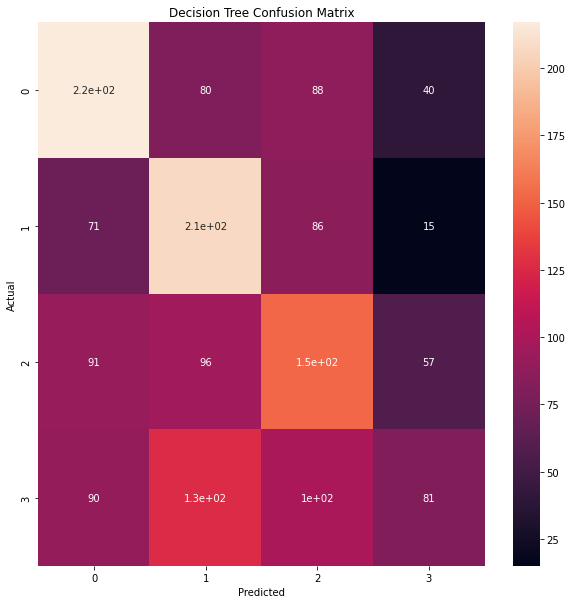

In [667]:
import seaborn as sn

test_out = test_out.reshape(len(test_out))
confusion_matrix = pd.crosstab(test_out, pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(10,10))
sn.heatmap(confusion_matrix, annot=True)
plt.title("Decision Tree Confusion Matrix")
plt.show()

The confusion matrix above gives us a better idea of where innacuracies evolved in our model. We see a large quantity of sex crimes and assaults being mistaken for larcenies and forgeries, which is interesting. You would expect less serious crimes like petty larceny and forgery to be mistaken for eachother, but that was not the case.

Finally, we use graphviz to illustrate our final decision tree.

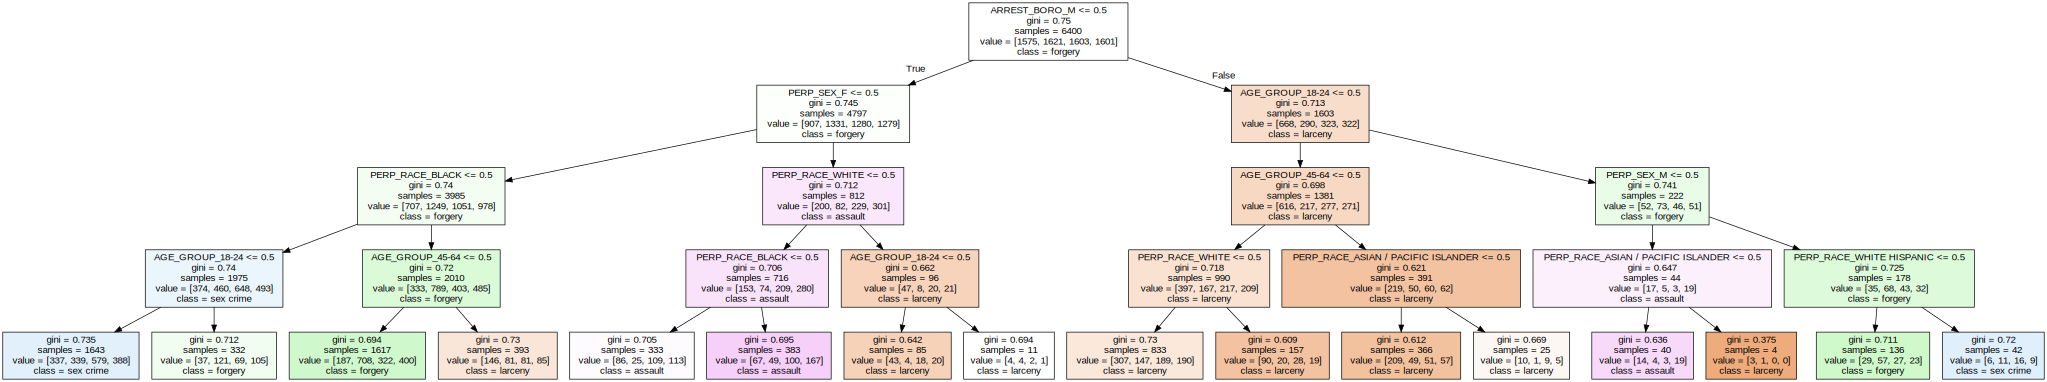

In [668]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=list(in_df.columns),
                                class_names=['larceny', 'forgery', 'sex crime', 'assault'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

Looking at the visualization for our decision tree, we can come to some interesting conclusions. We notice that the model deemed the most important factor when determining the type of crime committed was whether or not it took place in Manhattan (this varies run to run but seems to be true for the most part). This makes some sense, since as we saw earlier Manhattan has the highest proportional difference between misdemeanors and felonies of any borough. This could help the model in differentiating between what was most likely to be committed.

## 5. Conclusions

Overall, we've learned a lot about how arrests are distributed throughout the boroughs of NYC, not only in quantity but also in severity. I was surprised to find that Manhattan was disproportionately represented in arrests compared to its population, especially considering that its median household income is well above that of the other four boroughs. We found that this was in part due to a large proportion of these arrests being misdemeanors and not felonies, but this isn't the whole story. In that regard, there's certainly more to investigate. Maybe it has to do with population density, or with Manhattan's status as a global tourist destination. I don't think any effective policy decisions can be reached through the conclusions of this work, but it was certainly interesting to investigate.

In the future, further investigations could be made by cross-referencing this dataset with others. It could be interesting to look into how other factors like unemployment rate, cost of living, and rental costs play into the quantity and types of crimes in an area. Another direction this could be taken is through adding a time element to the data. It would be interesting to see not only general trends in city-wide crime rate over the years, but also how its distribution throughout the city changes over the years. I'm currently imagining a visualization which averages the coordinates of every arrest at a timestep, and plots throughout time the average location of arrest throughout New York.